In [20]:
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Importing & Vizualising data

In [136]:
import graphlab
graphlab.SFrame('home_data.gl/').to_dataframe().to_csv("home_data.csv", index=False)

ds = pandas.read_csv("home_data.csv")
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,5631500400,2015-02-25 00:00:00+00:00,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,2487200875,2014-12-09 00:00:00+00:00,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,1954400510,2015-02-18 00:00:00+00:00,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.616812,-122.044901,1800,7503


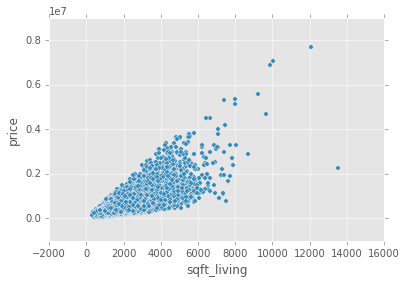

In [29]:
ds.plot(x="sqft_living", y="price", kind="scatter").figure.savefig("priceBySize.pdf")

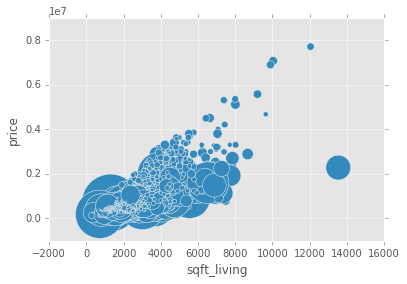

In [26]:
ds.plot(x="sqft_living", y="price", s=ds['sqft_lot'] / 500, kind="scatter")

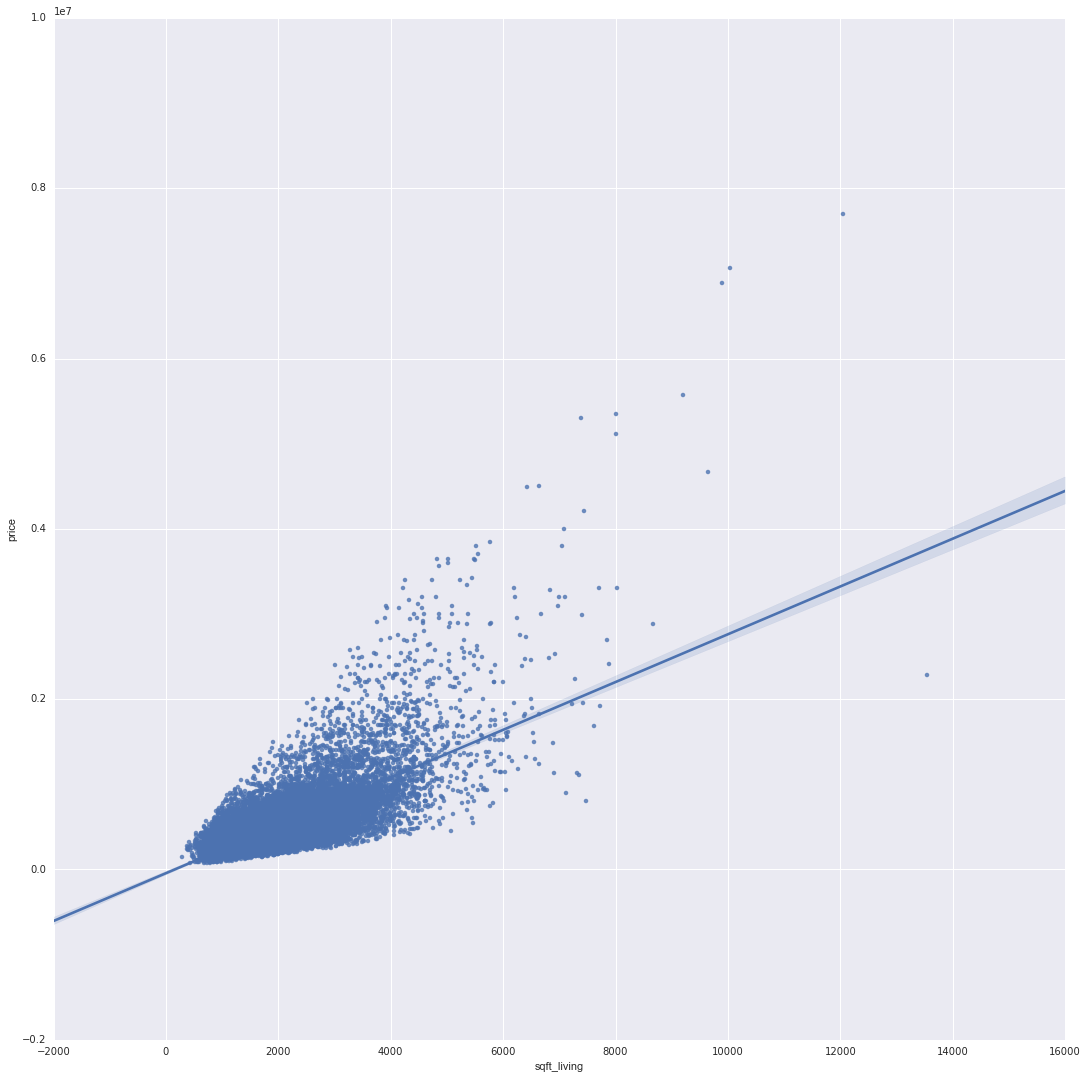

In [164]:
import seaborn
%matplotlib inline
seaborn.pairplot(ds,x_vars='sqft_living', y_vars='price',size=15, kind='reg')

# Creating a regression model of sqftLivig to Price

In [142]:
from sklearn.cross_validation import train_test_split
features = ds[['sqft_living','price']]
trainingDS,testDS = train_test_split(features, train_size=0.80, random_state=0)
(trainingDS, testDS)

(       sqft_living    price
 5268          1570   495000
 16909         1780   635000
 16123         1090   382500
 12181         2210   382500
 12617         1800   670000
 19024         3100  1001000
 5063          5070  1100000
 9888          1180   713000
 2774          1800   416000
 3197          3010   401000
 10315         2770   402000
 13059         1240   255000
 17081         1990   625000
 17152         2960   750000
 4857          2190   320000
 3930          1520   210000
 9619          1940   390000
 6913          2830  1030000
 13323         2160   715000
 9629          1650   360000
 98            1810   314000
 21317         1680   935000
 21563         2470   337000
 8105           990   285000
 261           1270   237000
 17640         2370   957000
 15780         2290   359950
 8251          1200   228950
 610           1100   340000
 18548         2410   745000
 ...            ...      ...
 1871          2460   247500
 18430         1010   400000
 7877         

In [149]:
from sklearn import linear_model
model =  linear_model.LinearRegression()
model.fit(trainingDS['sqft_living'], trainingDS['price'])
(model.coef_, model.intercept_)

/home/mgaudin/Documents/Sandbox/Coursera/ML/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [    1 17290]

# Evaluate the model

In [144]:
print ds['price'].mean()

540088.141905


In [145]:
predictions = testDS.join(pandas.DataFrame({ 'prediction': model.predict(testDS) }))
predictions

,sqft_living,price,prediction
17384,1430,297000,NaN
722,4670,1578000,585000
2680,1440,562100,750000
18754,1130,631500,NaN
14554,3180,780000,NaN
16227,1650,485000,NaN
6631,1720,340000,NaN
19813,2538,335606,NaN
3367,2460,425000,299990
21372,4460,490000,NaN


In [146]:
def toDF(name, arr):
    return pandas.DataFrame({ name: arr })

toDF('predictedPrice', model.predict(testDS)).head()

,predictedPrice
0,297000
1,1578000
2,562100
3,631500
4,780000


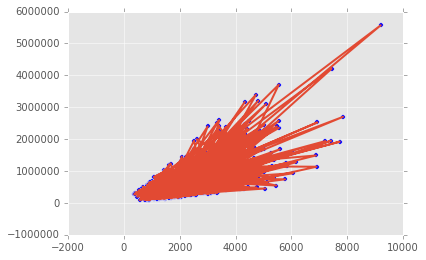

In [148]:
plt.scatter(testDS['sqft_living'], testDS['price'])
plt.plot(testDS['sqft_living'],  model.predict(testDS), linewidth=2)

plt.show()